In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit a logistic regression model to the training data
clf = LogisticRegression()
clf.fit(X_train, y_train)


C:\Users\abhis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# Use the classifier to make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate TP, TN, FP, and FN
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate accuracy, precision, recall, F1 score, MCC, specificity, and NPV
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
specificity = tn / (tn + fp)
npv = tn / (tn + fn)

# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("MCC:", mcc)
print("Specificity:", specificity)
print("NPV:", npv)


Confusion Matrix:
[[37  6]
 [ 2 69]]
TP: 69
TN: 37
FP: 6
FN: 2
Accuracy: 0.9298245614035088
Precision: 0.92
Recall: 0.971830985915493
F1 Score: 0.9452054794520549
MCC: 0.8503120383861473
Specificity: 0.8604651162790697
NPV: 0.9487179487179487


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report

print("Accuracy (sklearn):", accuracy_score(y_test, y_pred))
print("Precision (sklearn):", precision_score(y_test, y_pred))
print("Recall (sklearn):", recall_score(y_test, y_pred))
print("F1 Score (sklearn):", f1_score(y_test, y_pred))
print(f'MCC: {matthews_corrcoef(y_test, y_pred)}')






Accuracy (sklearn): 0.9298245614035088
Precision (sklearn): 0.92
Recall (sklearn): 0.971830985915493
F1 Score (sklearn): 0.9452054794520549
MCC: 0.8503120383861473


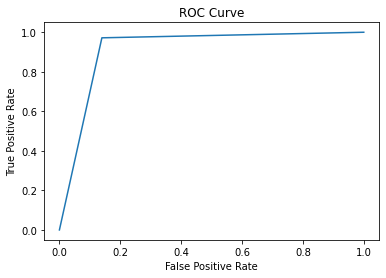

AUC: 0.9829675728791352


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate probabilities for the positive class (class 1)
#probs = clf.predict_proba(X_test)[:, 1]

# # Calculate the false positive rate, true positive rate, and thresholds for various threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the AUC score
auc_score = roc_auc_score(y_test, probs)
print(f'AUC: {auc_score}')
